# Churn Prediction using Machine learning Models 

## Problem statement 
### The goal of this project is to develop a predictive model to identify telecom customers who are at risk of churning (discontinuing their service) within a specified time frame. By accurately predicting customer churn, the telecom company aims to proactively implement targeted retention strategies to reduce churn rates, improve customer satisfaction, and maximize long-term revenue.

## Preparing the tools 

In [63]:
#Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns 

# we can our plots to appear inside the notebook using %matplotlib inline 
%matplotlib inline  

#For feature transformation 

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN, SMOTETomek 

#models from Scikit-Learn

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


#Model Evaluation

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
from sklearn.metrics import plot_roc_curve,roc_auc_score

import warnings
warnings.filterwarnings('ignore')





## Load the data

In [4]:
df=pd.read_csv("Telco_Customer_Churn .csv")
df.shape

(7043, 21)

# Exploratory data analysis

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# find how many of each class there 
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

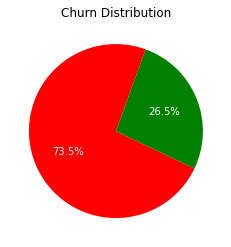

In [7]:
df['Churn'].value_counts().plot(
    kind='pie',
    colors=['Red', 'Green'],         # Slice colors
    autopct='%1.1f%%',              # Show percentages
    startangle=70,                  # Rotate chart for better orientation
    textprops={'color': 'white'},   # Set text color to white
    title="Churn Distribution"      # Add a title
)
plt.ylabel('')  # Remove default y-axis label
plt.show()      # Display the chart


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Churn Frequency according to Gender


In [12]:
df.gender.value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [13]:
#Compare churn column with target column 

pd.crosstab(df.Churn,df.gender)

gender,Female,Male
Churn,,
No,2549,2625
Yes,939,930


(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

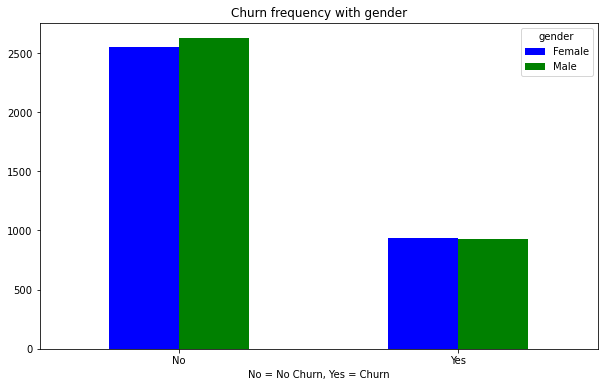

In [14]:
# Create a plot of crosstab

pd.crosstab(df.Churn,df.gender).plot(kind='bar',figsize=(10,6),color=['blue','green'])
plt.title("Churn frequency with gender")
plt.xlabel('No = No Churn, Yes = Churn')
plt.xticks(rotation=0)

## Monthly charges Vs Churn Rate

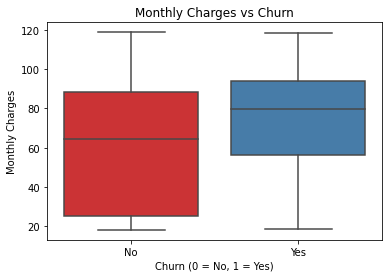

In [15]:
#Boxplot shows the spread (distribution) of monthly charges for both churned and non-churned customers.Helps identify whether higher monthly charges correlate with higher churn rates.

sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='Set1')
plt.title('Monthly Charges vs Churn')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Monthly Charges')
plt.show()


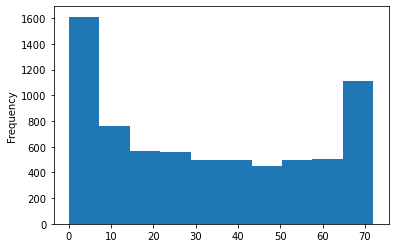

In [16]:
#check the distrubution of the tenure column 
df['tenure'].plot.hist();


<AxesSubplot:xlabel='Churn', ylabel='tenure'>

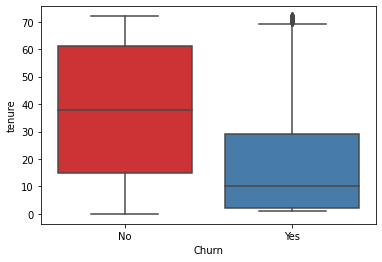

In [17]:
sns.boxplot(x='Churn', y='tenure', data=df,palette='Set1')

In [18]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [19]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [20]:
df.drop('customerID',axis=1,inplace=True)


# Analysing numerical features

<AxesSubplot:>

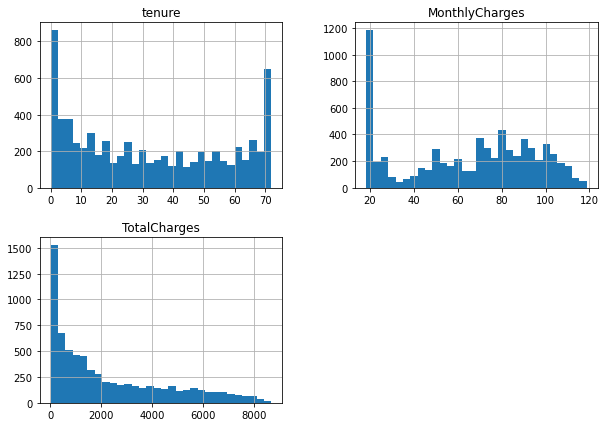

In [21]:
df[['tenure', 'MonthlyCharges', 'TotalCharges']].hist(bins=30, figsize=(10, 7))
sns.boxplot(data=df[['tenure', 'MonthlyCharges', 'TotalCharges']])


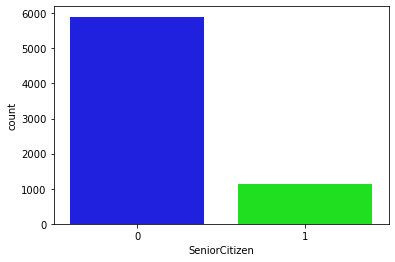

In [22]:
sns.countplot(x='SeniorCitizen', data=df,palette=["blue", "#00FF00"])
plt.show()


# Correlation heatmap 

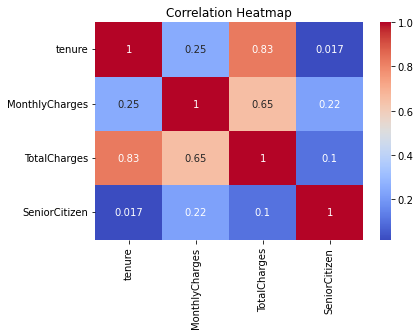

In [23]:

sns.heatmap(df[['tenure', 'MonthlyCharges', 'TotalCharges','SeniorCitizen']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Modelling

In [24]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [25]:
#Split data into X and Y
x=df.drop('Churn',axis=1)
y=df['Churn']

In [26]:
x.shape,y.shape

((7043, 19), (7043,))

In [27]:
#data transformation 

nume= x.select_dtypes(include = 'number').columns.tolist()
categ = x.select_dtypes(include = 'object').columns.tolist()

num_pipline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    #Fills in missing values using the median
    ('scaler', StandardScaler())
    #Standardizes the values to have a mean of 0 and standard deviation of 1.
])

cat_pipline = Pipeline([
    ('encoder', OrdinalEncoder())
    #Encodes categories into numerical values using OrdinalEncoder.
])

preprosser = ColumnTransformer([
    ('numeric', num_pipline, nume),#Merges both pipelines (numeric and categorical) into a single ColumnTransformer.
    ('categorical', cat_pipline, categ)#Ensures the correct transformations are applied to the corresponding feature types.
])
preprosser

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['SeniorCitizen', 'tenure', 'MonthlyCharges',
                                  'TotalCharges']),
                                ('categorical',
                                 Pipeline(steps=[('encoder',
                                                  OrdinalEncoder())]),
                                 ['gender', 'Partner', 'Dependents',
                                  'PhoneService', 'MultipleLines',
                                  'InternetService', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection',
                                  'TechSupport', 'StreamingTV',
                                  'StreamingMovies', 'Contract',
                                  'PaperlessBilling', 'PaymentMethod'])])

In [28]:
## Fiting Preprosser Object in X Features ###

X_transformed = preprosser.fit_transform(x)

### Checking X_pre_transformed ###

X_transformed.shape 

(7043, 19)

In [29]:
#TARGET value encoding

lebenc = LabelEncoder()
y_encoded = lebenc.fit_transform(y)


### Checking y_encoded Shape ###
y_encoded.shape

(7043,)

In [30]:
#data balancing 

smt = SMOTEENN()
X_resampled, y_resampled = smt.fit_resample(X_transformed, y_encoded)
X_resampled.shape, y_resampled.shape

((6416, 19), (6416,))

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)

In [32]:
models={"Logistic Regression":LogisticRegression(),
        "KNN":KNeighborsClassifier(),
        "Random Forest":RandomForestClassifier(),
        'SVC': SVC(),
        'GradientBoostingClassifier': GradientBoostingClassifier(),
        'AdaBoostClassifier': AdaBoostClassifier(),
        'DecisionTreeClassifier': DecisionTreeClassifier()}

#Create a function to fit and score models

def fit_and_evaluate(models,x_train, x_test, y_train, y_test ):

        # a dictionary to keep model scores
        model_score={}

        #loop through models
        for name,model in models.items():

                #fit the model to data 
                model.fit(x_train,y_train)

                #evaluate the model and append the score 

                model_score[name]=model.score(x_test,y_test)
        return model_score

In [33]:
models_score=fit_and_evaluate(models,x_train, x_test, y_train, y_test)
models_score

{'Logistic Regression': 0.9088785046728972,
 'KNN': 0.9376947040498442,
 'Random Forest': 0.9626168224299065,
 'SVC': 0.9338006230529595,
 'GradientBoostingClassifier': 0.9524922118380063,
 'AdaBoostClassifier': 0.9376947040498442,
 'DecisionTreeClassifier': 0.9314641744548287}

# Model Comparison

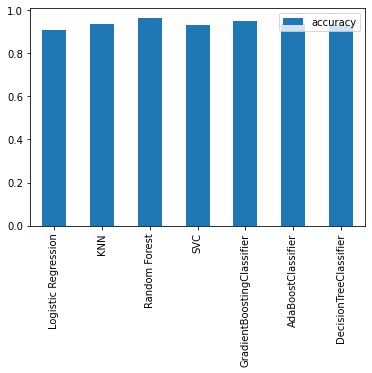

In [34]:
model_compare=pd.DataFrame(models_score,index=['accuracy'])
model_compare.T.plot.bar();

# Hyperparameter tuning 

In [97]:
def model_evaluate(true,predicted,model,x_test):
    model_score={}
    model_score['accuracy'] = accuracy_score(true, predicted)
    model_score['f1 score'] = f1_score(true, predicted)
    model_score['precision']= precision_score(true, predicted)
    model_score['recall'] = recall_score(true, predicted)
    model_score['roc_auc'] = roc_auc_score(true, predicted)
    print(model_score)
    
    print("confusion matrix")
    print(confusion_matrix(true,predicted))

    plot_conf_mat(true, predicted)
    print(classification_report(true,predicted))
    
    

    
   
    
    
    

In [117]:
#Hyper parameter tuning for Logistic Regression 


log_reg_grid={"C":np.logspace(-4,4,30),
            "solver":['liblinear']}
gs_log_reg=GridSearchCV(LogisticRegression(),param_grid=log_reg_grid,cv=5,verbose=True)
gs_log_reg.fit(x_train,y_train)
gs_log_reg.best_params_
gs_log_reg.score(x_test,y_test)




Fitting 5 folds for each of 30 candidates, totalling 150 fits


0.9026186579378068

# Evaluating our model

### Logistic Regression

{'accuracy': 0.910436137071651, 'f1 score': 0.9191848208011244, 'precision': 0.9083333333333333, 'recall': 0.930298719772404, 'roc_auc': 0.9083507368225187}
confusion matrix
[[515  66]
 [ 49 654]]


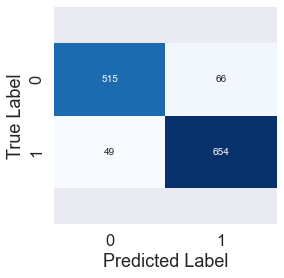

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       581
           1       0.91      0.93      0.92       703

    accuracy                           0.91      1284
   macro avg       0.91      0.91      0.91      1284
weighted avg       0.91      0.91      0.91      1284



In [98]:
#Logistic Regression 
y_preds=gs_log_reg.predict(x_test)
performance=model_evaluate(y_test,y_preds,gs_log_reg,x_test)


In [40]:
print(confusion_matrix(y_test,y_preds))

[[515  66]
 [ 49 654]]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(4, 4))  # Adjust size as needed
    
    # Create heatmap for the confusion matrix
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,           # Annotate cells with numbers
                     fmt="d",              # Ensure integers, not scientific notation
                     cbar=False,           # Disable color bar
                     cmap="Blues")         # Use a blue color palette
    
    # Add axis labels
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    
    # Fix heatmap alignment
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
    # Show the plot
    plt.show()

# Call the function with your test and predicted labels
plot_conf_mat(y_test, y_preds)


              precision    recall  f1-score   support

           0       0.91      0.89      0.90       581
           1       0.91      0.93      0.92       703

    accuracy                           0.91      1284
   macro avg       0.91      0.91      0.91      1284
weighted avg       0.91      0.91      0.91      1284



In [99]:
#Hyper parameter tuning for RandomForestClassifier
rf_grid={'n_estimators':np.arange(10,300,70),
        'max_depth':[None,3,5,10],
        'min_samples_split':np.arange(2,20,5)}

gs_rf_grid=GridSearchCV(RandomForestClassifier(),param_grid=rf_grid)
gs_rf_grid.fit(x_train,y_train)
gs_rf_grid.best_params_
gs_rf_grid.score(x_test,y_test)

0.9657320872274143

{'accuracy': 0.9657320872274143, 'f1 score': 0.9688826025459689, 'precision': 0.9634317862165963, 'recall': 0.9743954480796586, 'roc_auc': 0.9648225088935298}
confusion matrix
[[555  26]
 [ 18 685]]


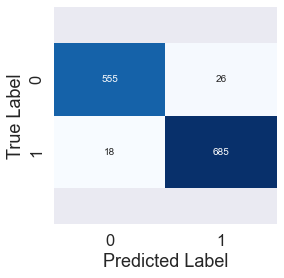

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       581
           1       0.96      0.97      0.97       703

    accuracy                           0.97      1284
   macro avg       0.97      0.96      0.97      1284
weighted avg       0.97      0.97      0.97      1284



In [100]:
y_preds=gs_rf_grid.predict(x_test)
performance=model_evaluate(y_test,y_preds,gs_rf_grid,x_test)

In [101]:
#Hyper parameter tuning for KNeighborsClassifier
knn_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']}

gs_knn=GridSearchCV(KNeighborsClassifier(),param_grid=knn_grid)
gs_knn.fit(x_train,y_train)

gs_knn.score(x_test,y_test)

0.9672897196261683

{'accuracy': 0.9672897196261683, 'f1 score': 0.9708737864077671, 'precision': 0.9472259810554804, 'recall': 0.9957325746799431, 'roc_auc': 0.9643034646205223}
confusion matrix
[[542  39]
 [  3 700]]


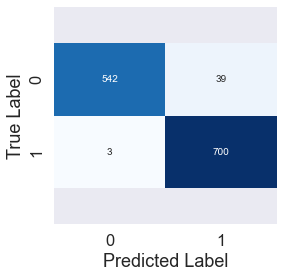

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       581
           1       0.95      1.00      0.97       703

    accuracy                           0.97      1284
   macro avg       0.97      0.96      0.97      1284
weighted avg       0.97      0.97      0.97      1284



In [102]:
y_preds=gs_knn.predict(x_test)
performance=model_evaluate(y_test,y_preds,gs_knn,x_test)

In [104]:
# Hyper parameter tuning for Support Vector machine
SVC_HYPER= {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    }
gs_svc=GridSearchCV(SVC(),param_grid=SVC_HYPER)
gs_svc.fit(x_train,y_train)
gs_svc.score(x_test,y_test)


0.955607476635514

{'accuracy': 0.955607476635514, 'f1 score': 0.9600560616678346, 'precision': 0.9461325966850829, 'recall': 0.9743954480796586, 'roc_auc': 0.9536349013203801}
confusion matrix
[[542  39]
 [ 18 685]]


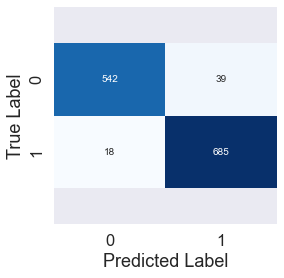

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       581
           1       0.95      0.97      0.96       703

    accuracy                           0.96      1284
   macro avg       0.96      0.95      0.96      1284
weighted avg       0.96      0.96      0.96      1284



In [105]:
y_preds=gs_svc.predict(x_test)
performance=model_evaluate(y_test,y_preds,gs_svc,x_test)

In [106]:
# Hyper parameter tuning for DecisionTreeClassifier
DecisionTree_hyper= {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2]
    }
dec_tree=GridSearchCV(DecisionTreeClassifier(),param_grid=DecisionTree_hyper)
dec_tree.fit(x_train,y_train)
dec_tree.score(x_test,y_test)

0.940809968847352

{'accuracy': 0.940809968847352, 'f1 score': 0.9461756373937676, 'precision': 0.9421720733427362, 'recall': 0.9502133712660028, 'roc_auc': 0.9398226925176829}
confusion matrix
[[540  41]
 [ 35 668]]


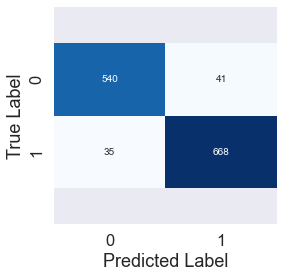

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       581
           1       0.94      0.95      0.95       703

    accuracy                           0.94      1284
   macro avg       0.94      0.94      0.94      1284
weighted avg       0.94      0.94      0.94      1284



In [107]:
y_preds=dec_tree.predict(x_test)
performance=model_evaluate(y_test,y_preds,dec_tree,x_test)

# Model training with 7 features

In [108]:
X_2 = x[['gender', 'PaymentMethod','InternetService','Contract', 'tenure', 'MonthlyCharges', 'TotalCharges']]
y_2=y


In [109]:

### Spliting Numeric Features and Categorical Features ###

numeric_features = X_2.select_dtypes(include=np.number).columns.tolist()
categorical_features = X_2.select_dtypes(include="object").columns.tolist()
### Numeric Pipline ###

num_pipline_1 = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('scaler', StandardScaler())
])

### Categorical Pipline ###

cat_pipline_1 = Pipeline([
    ('encoder', OrdinalEncoder())
])

### ColumnTransformer Object ###
preprosser_1 = ColumnTransformer([
    ('numeric', num_pipline_1,numeric_features),
    ('categorical', cat_pipline_1,categorical_features)
])
preprosser_1

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['tenure', 'MonthlyCharges', 'TotalCharges']),
                                ('categorical',
                                 Pipeline(steps=[('encoder',
                                                  OrdinalEncoder())]),
                                 ['gender', 'PaymentMethod', 'InternetService',
                                  'Contract'])])

In [110]:
# Fiting Preprosser Object in X Features ###

X_pre_transformed_1 = preprosser_1.fit_transform(X_2)

### Checking X_pre_transformed ###

X_pre_transformed_1.shape

(7043, 7)

In [111]:
le = LabelEncoder()
y_encoded_1 = le.fit_transform(y_2)
y_encoded_1

array([0, 0, 1, ..., 0, 1, 0])

In [112]:
smt_1 = SMOTEENN()
X_resampled_1, y_resampled_1 = smt_1.fit_resample(X_pre_transformed_1, y_encoded_1)
X_resampled_1.shape, y_resampled_1.shape

((6106, 7), (6106,))

In [113]:
x_train, x_test, y_train, y_test = train_test_split(X_resampled_1,y_resampled_1,test_size=0.2,random_state=42)

In [118]:
log_reg_grid={"C":np.logspace(-4,4,30),
            "solver":['liblinear']}
gs_log_reg=GridSearchCV(LogisticRegression(),param_grid=log_reg_grid,cv=5,verbose=True)
gs_log_reg.fit(x_train,y_train)
gs_log_reg.best_params_
gs_log_reg.score(x_test,y_test)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


0.9026186579378068

{'accuracy': 0.9026186579378068, 'f1 score': 0.9015715467328371, 'precision': 0.8733974358974359, 'recall': 0.9316239316239316, 'roc_auc': 0.9038025466596895}
confusion matrix
[[558  79]
 [ 40 545]]


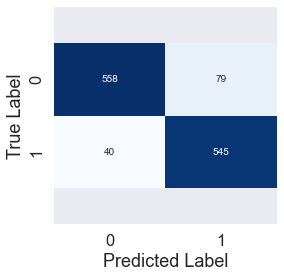

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       637
           1       0.87      0.93      0.90       585

    accuracy                           0.90      1222
   macro avg       0.90      0.90      0.90      1222
weighted avg       0.90      0.90      0.90      1222



In [119]:
#Logistic Regression 
y_preds=gs_log_reg.predict(x_test)
performance=model_evaluate(y_test,y_preds,gs_log_reg,x_test)

In [120]:
#Hyper parameter tuning for RandomForestClassifier
rf_grid={'n_estimators':np.arange(10,300,70),
        'max_depth':[None,3,5,10],
        'min_samples_split':np.arange(2,20,5)}

gs_rf_grid=GridSearchCV(RandomForestClassifier(),param_grid=rf_grid)
gs_rf_grid.fit(x_train,y_train)
gs_rf_grid.best_params_
gs_rf_grid.score(x_test,y_test)

0.9787234042553191

{'accuracy': 0.9787234042553191, 'f1 score': 0.9778156996587032, 'precision': 0.9761499148211243, 'recall': 0.9794871794871794, 'roc_auc': 0.9787545787545787}
confusion matrix
[[623  14]
 [ 12 573]]


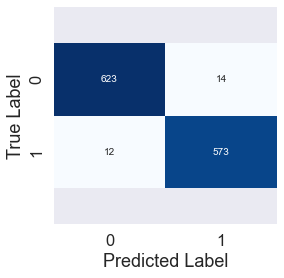

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       637
           1       0.98      0.98      0.98       585

    accuracy                           0.98      1222
   macro avg       0.98      0.98      0.98      1222
weighted avg       0.98      0.98      0.98      1222



In [121]:
y_preds=gs_rf_grid.predict(x_test)
performance=model_evaluate(y_test,y_preds,gs_rf_grid,x_test)

In [122]:
#Hyper parameter tuning for KNeighborsClassifier
knn_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']}

gs_knn=GridSearchCV(KNeighborsClassifier(),param_grid=knn_grid)
gs_knn.fit(x_train,y_train)

gs_knn.score(x_test,y_test)

0.9877250409165302

{'accuracy': 0.9877250409165302, 'f1 score': 0.9872122762148339, 'precision': 0.9846938775510204, 'recall': 0.9897435897435898, 'roc_auc': 0.9878074306645735}
confusion matrix
[[628   9]
 [  6 579]]


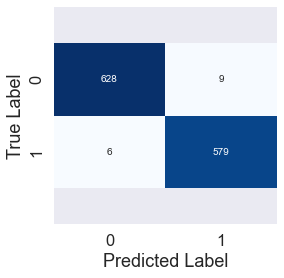

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       637
           1       0.98      0.99      0.99       585

    accuracy                           0.99      1222
   macro avg       0.99      0.99      0.99      1222
weighted avg       0.99      0.99      0.99      1222



In [123]:
y_preds=gs_knn.predict(x_test)
performance=model_evaluate(y_test,y_preds,gs_knn,x_test)

In [124]:
# Hyper parameter tuning for Support Vector machine
SVC_HYPER= {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    }
gs_svc=GridSearchCV(SVC(),param_grid=SVC_HYPER)
gs_svc.fit(x_train,y_train)
gs_svc.score(x_test,y_test)

0.9238952536824877

{'accuracy': 0.9238952536824877, 'f1 score': 0.9215189873417723, 'precision': 0.91, 'recall': 0.9333333333333333, 'roc_auc': 0.9242804814233385}
confusion matrix
[[583  54]
 [ 39 546]]


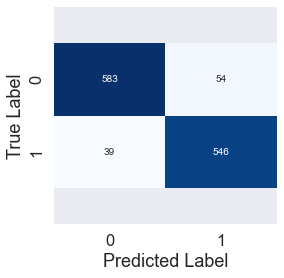

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       637
           1       0.91      0.93      0.92       585

    accuracy                           0.92      1222
   macro avg       0.92      0.92      0.92      1222
weighted avg       0.92      0.92      0.92      1222



In [125]:
y_preds=gs_svc.predict(x_test)
performance=model_evaluate(y_test,y_preds,gs_svc,x_test)

### Across the 5 models ,KNeighborsClassifier achieved the highest accuracy of 98.7